In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType, do_adult_easy_benchmarks
import matplotlib
import statistics

from mlinspect.utils import get_project_root

In [ ]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #fig.set_size_inches(8, 10)
    ax.axis('equal')
    #plt.locator_params("y", numticks=12)
    #major_ticks = [0.001, 0.01, 0.1, 1., 10.][:len(run_row_numbers)]
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

In [ ]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [ ]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [ ]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [ ]:
row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
#row_numbers = [100, 1000, 10000, 100000, 1000000]

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstRowsInspection(10)": "dotted", 
    "LineageInspection(10)": "dashed", 
    "HistogramInspection(['group_col'])": "dashdot"}

In [ ]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles)

In [ ]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles)

In [ ]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles)

In [ ]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles)

In [ ]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles)

In [ ]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles)

In [ ]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles)

In [ ]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles)

In [ ]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles)

In [ ]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles)

In [11]:
def parseAndBoxPlot(benchmark_results, name, save_to_file=False):    
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    data_to_plot = benchmark_results.values()
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    #for box in bp['boxes']:
    #    # change outline color
    #    box.set( color='#7570b3', linewidth=2)
        # change fill color
    #    box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    #for whisker in bp['whiskers']:
    #    whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    #for cap in bp['caps']:
    #    cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    #for median in bp['medians']:
    #    median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
    #    flier.set(marker='o', color='#e7298a', alpha=0.5)
        
    ## Custom x-axis labels
    ax.set_xticklabels(benchmark_results.keys())
    
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    ax.set_ylabel('Time in [s]')
    
    ax.autoscale(enable=True, tight=True)

    # Save the figure
    if save_to_file:
        fig.savefig(result_file_name + '.svg', bbox_inches='tight')
    plt.show()
    plt.close()

In [12]:
benchmark_results = do_adult_easy_benchmarks(3)
mean_benchmark_results = {}
for label, results in benchmark_results.items():
    current_list = mean_benchmark_results.get(label, [])
    current_list.append(statistics.mean(results))
    mean_benchmark_results[label] = current_list


print("Results")
for label, results in benchmark_results.items():
    print("{}: {}".format(label, results))
    
print("Mean Results")
for label, results in mean_benchmark_results.items():
    print("{}: {}".format(label, results))

pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline start
pipeline finished
pipeline s

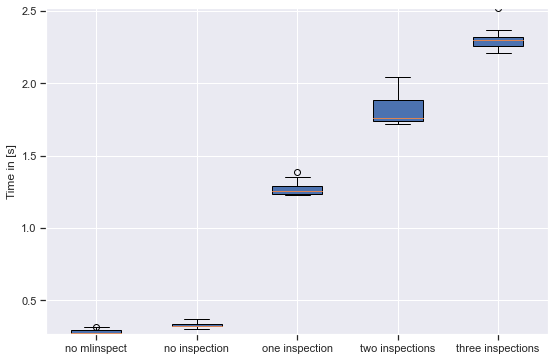

In [13]:
parseAndBoxPlot(benchmark_results, "adult_easy")